In [1]:
import os

In [72]:
from skimage import io
from skimage import filters
from skimage import morphology
from skimage.filters import sobel
from skimage.color import rgb2gray
from skimage.feature import CENSURE
from skimage.feature import ORB
from skimage.feature import match_descriptors
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
path_dataset = 'mednode_dataset/'

In [5]:
etiquetas = os.listdir(path_dataset)

In [6]:
etiquetas

['melanoma', 'naevus']

In [7]:
etiqueta_0 = os.path.join(path_dataset, etiquetas[0])

In [8]:
etiqueta_1 = os.path.join(path_dataset, etiquetas[1])

In [9]:
imgs_etiqueta_0 = os.listdir(etiqueta_0)

In [10]:
imgs_etiqueta_1 = os.listdir(etiqueta_1)

In [11]:
def show_imgs(etiqueta, imgs_etiquetas):
    for img in imgs_etiquetas:
        path_img = os.path.join(etiqueta, img)
        print(f'{path_img}')
        image = io.imread(path_img)
        plt.title(f'{img}')
        plt.imshow(image)
        plt.tight_layout()
        plt.axis('off')
        plt.show()

In [12]:
# show_imgs(etiqueta_0, imgs_etiqueta_0)

In [13]:
# show_imgs(etiqueta_1, imgs_etiqueta_1)

In [14]:
def show_imgs_grays(etiqueta, imgs_etiquetas):
    for img in imgs_etiquetas:
        path_img = os.path.join(etiqueta, img)
        print(f'{path_img}')
        image = io.imread(path_img)
        image = rgb2gray(image)
        plt.title(f'{img}')
        plt.imshow(image, cmap='gray')
        plt.tight_layout()
        plt.axis('off')
        plt.show()

In [15]:
# show_imgs_grays(etiqueta_0, imgs_etiqueta_0)

In [16]:
def show_imgs_grays_sobel(etiqueta, imgs_etiquetas):
    for img in imgs_etiquetas:
        path_img = os.path.join(etiqueta, img)
        print(f'{path_img}')
        image = io.imread(path_img)
        image = rgb2gray(image)
        image = sobel(image)
        plt.title(f'{img}')
        plt.imshow(image, cmap='gray')
        plt.tight_layout()
        plt.axis('off')
        plt.show()

In [17]:
# show_imgs_grays_sobel(etiqueta_0, imgs_etiqueta_0)

In [18]:
def show_imgs_keypoints(etiqueta, imgs_etiquetas):
    # keypoints = {}
    for img in imgs_etiquetas:
        path_img = os.path.join(etiqueta, img)
        print(f'{path_img}')
        image = io.imread(path_img)
        image = rgb2gray(image)
        censure = CENSURE(min_scale=1, max_scale=10)
        censure.detect(image)
       # keypoints[img] = censure.keypoints
        plt.title(f'{img}')
        plt.imshow(image, cmap='gray')
        plt.scatter(censure.keypoints[:, 1], censure.keypoints[:, 0],
              2 ** censure.scales, facecolors='none', edgecolors='r')
        plt.tight_layout()
        plt.axis('off')
        plt.show()
        break
    # return keypoints

In [19]:
# show_imgs_keypoints(etiqueta_0, imgs_etiqueta_0)

In [20]:
from scipy import stats

In [21]:
[d for d in dir(stats) if not d.startswith('_')]

['PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_distance',
 'entropy',
 'epps_singleton_2samp',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'f_oneway',
 'fatiguelife',
 'find_repeats',
 'fisher_exact',
 'fisk',
 'fligner',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 

In [22]:
from scipy.stats import entropy
import pandas as pd

In [156]:
def show_imgs_keypoints_features(etiqueta, imgs_etiquetas):
    features = {}
    for n,img in enumerate(imgs_etiquetas):
        path_img = os.path.join(etiqueta, img)
        image = io.imread(path_img)
        image_r = image.copy()[:,:,0]
        image_g = image.copy()[:,:,1]
        image_b = image.copy()[:,:,2]
        image_gray = rgb2gray(image)
        images = [('red',image_r), ('green', image_g), ('blue', image_b), ('gray', image_gray)]
        features[img] = {}
        keypoints = []
        for label, image in images:
            censure = ORB(n_keypoints=10,
                          downscale=1.2,
                          n_scales=9,
                          fast_n=4,
                          fast_threshold=0.06,
                          harris_k=0.04)
            censure.detect_and_extract(image)
            keypoints.extend(censure.keypoints.copy())
        for label, image in images:
            for ix, kp in enumerate(keypoints):
                crop = image[int(kp[0])-3:int(kp[0])+4, int(kp[1])-3:int(kp[1])+4].copy()
                features[img][f'{label}-{ix}'] = {
                    'color': label,
                    'kp': ix,
                    'img': img,
                    'sum': crop.sum(),
                    'min': crop.min(),
                    'max': crop.max(),
                    'mean': crop.mean(),
                    'std': crop.std(),
                    'entropy': entropy(crop.ravel())
                }
#             plt.title(f'{img}-{label}')
#             plt.imshow(image, cmap='gray')
#             plt.scatter([kp[1] for kp in keypoints], [kp[0] for kp in keypoints],
#                   2 ** 1, facecolors='none', edgecolors='r')
#             plt.tight_layout()
#             plt.axis('off')
#             plt.show()
    return features

In [157]:
features = show_imgs_keypoints_features(etiqueta_0, imgs_etiqueta_0)

In [158]:
datas = []
for img in features.keys():
    for ix in features[img].keys():
        datas.append(features[img][ix])

In [159]:
df = pd.DataFrame(datas)

In [162]:
df.to_csv('datasets_melanoma.csv', index=False)

In [164]:
df = pd.read_csv('datasets_melanoma.csv')

In [198]:
describe_features = {}
for img in set(df.img.values):
    df_img = df[df.img==img]
    describe_features[img] = df_img.describe()

In [199]:
set(df.img.values)

{'154372.jpg',
 '16175.jpg',
 '1651872.jpg',
 '1657793.jpg',
 '1685446.jpg',
 '1698285.jpg',
 '1732302.jpg',
 '1753755.jpg',
 '1759904.jpg',
 '1761976-h.jpg',
 '1834988.jpg',
 '189827.jpg',
 '1908473-h.jpg',
 '1921282.jpg',
 '200823.jpg',
 '204176-h.jpg',
 '2050866.jpg',
 '2068850.jpg',
 '2070249.jpg',
 '2073001.jpg',
 '2093897.jpg',
 '2101441.jpg',
 '2113041.jpg',
 '2128172.jpg',
 '2130113.jpg',
 '2143742.jpg',
 '2150201.jpg',
 '2183884.jpg',
 '2190031.jpg',
 '2216854.jpg',
 '2234484-h.jpg',
 '226555.jpg',
 '231682.jpg',
 '236042-h.jpg',
 '236936.jpg',
 '252641.jpg',
 '257160-h.jpg',
 '258242.jpg',
 '258765.jpg',
 '268766.jpg',
 '269965.jpg',
 '2827.jpg',
 '294186.jpg',
 '307150.jpg',
 '325519.jpg',
 '343673.jpg',
 '346822-h.jpg',
 '348704.jpg',
 '351510-h.jpg',
 '351512-h.jpg',
 '359117.jpg',
 '363475.jpg',
 '369664.jpg',
 '379222.jpg',
 '394854.jpg',
 '400837.jpg',
 '408295.jpg',
 '432078.jpg',
 '503496.jpg',
 '512681-h.jpg',
 '521443.jpg',
 '550952.jpg',
 '555361-h.jpg',
 '561152-h

In [260]:
features1 = show_imgs_keypoints_features(etiqueta_1, imgs_etiqueta_1)

In [261]:
datas1 = []
for img in features1.keys():
    for ix in features1[img].keys():
        datas1.append(features1[img][ix])

In [262]:
df1 = pd.DataFrame(datas1)

In [263]:
df1.to_csv('datasets_naevus.csv', index=False)

In [264]:
df1 = pd.read_csv('datasets_naevus.csv')

In [265]:
describe_features1 = {}
for img in set(df1.img.values):
    df_img1 = df1[df1.img==img]
    describe_features1[img] = df_img1.describe()

In [266]:
set(df1.img.values)

{'132357.jpg',
 '151560-h.jpg',
 '156136.jpg',
 '159033.jpg',
 '162029.jpg',
 '163067.jpg',
 '165021.jpg',
 '1697738.jpg',
 '170216.jpg',
 '174267.jpg',
 '19085.jpg',
 '194942.jpg',
 '194946.jpg',
 '202700-h.jpg',
 '2055339.jpg',
 '2084031.jpg',
 '2085285.jpg',
 '2085287.jpg',
 '2097673.jpg',
 '2098348.jpg',
 '2104146.jpg',
 '2111038.jpg',
 '2138627.jpg',
 '21457.jpg',
 '2159198.jpg',
 '2160810.jpg',
 '2161172.jpg',
 '2162992-h.jpg',
 '2162995.jpg',
 '2166853.jpg',
 '2167180.jpg',
 '2168356-h.jpg',
 '2168363.jpg',
 '2168366-h.jpg',
 '2168397.jpg',
 '21821.jpg',
 '2191579.jpg',
 '2191631.jpg',
 '2191634.jpg',
 '2191673.jpg',
 '2191699-h.jpg',
 '2191726.jpg',
 '2192103.jpg',
 '2192661-h.jpg',
 '2195219-h.jpg',
 '2197027.jpg',
 '2197584.jpg',
 '2197588.jpg',
 '2197724.jpg',
 '2197727.jpg',
 '2199594.jpg',
 '2202309-h.jpg',
 '2203331-h.jpg',
 '2203387.jpg',
 '2206231.jpg',
 '2207655.jpg',
 '2209992-h.jpg',
 '2210466.jpg',
 '2211094.jpg',
 '2212044.jpg',
 '2212220-h.jpg',
 '2212282.jpg',
 '

In [276]:
X = [describe_features[img].ix[['mean', 'std']].values.ravel() for img in set(df.img.values)]
y = [1. for _ in X]
leny = len(y)
X.extend([describe_features1[img].ix[['mean', 'std']].values.ravel() for img in set(df1.img.values)])
y = [1. if i < leny else 0. for i,_ in enumerate(X)]

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [277]:
len(X), len(y)

(169, 169)

In [722]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [365]:
clf = Perceptron()

In [366]:
clf = LinearRegression()

In [482]:
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')

In [489]:
clf = svm.LinearSVC(max_iter=10000, tol=0.001, multi_class='crammer_singer')

In [755]:
SGDC = SGDClassifier(tol=0.00001, loss="modified_huber", shuffle=False, penalty="elasticnet", max_iter=10000, validation_fraction=0.50)

In [812]:
parameters = {
    'loss': ('log', 'modified_huber'), 
    'tol': [0.00001, 0.0001, 0.001, 0.01, 0.1], 
    'penalty': ('elasticnet', 'l2', 'l1'),
    'validation_fraction': [0.60, 0.50, 0.40, 0.30, 0.20, 0.10]
}

In [837]:
clf = GridSearchCV(SGDC, parameters, cv=5)

In [838]:
clf = clf.fit(X_train, y_train)

c:\program files (x86)\python36-32\lib\site-packages\scikit_learn-0.21.2-py3.6-win32.egg\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [839]:
y_pred = clf.predict(X_test)

In [840]:
r2_score(y_test, y_pred)

-0.05882352941176472

In [841]:
mean_squared_error(y_test, y_pred)

0.2647058823529412

In [842]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.94      0.78        17
         1.0       0.90      0.53      0.67        17

    accuracy                           0.74        34
   macro avg       0.78      0.74      0.72        34
weighted avg       0.78      0.74      0.72        34



In [111]:
from scipy.ndimage import binary_fill_holes

In [117]:
def show_imgs_filtered(etiqueta, imgs_etiquetas):
    for n,img in enumerate(imgs_etiquetas):
        path_img = os.path.join(etiqueta, img)
        print(f'{path_img}')
        image = io.imread(path_img)
        plt.title(f'{img}')
        plt.imshow(image)
        plt.tight_layout()
        plt.axis('off')
        plt.show()
        
        image_r = image.copy()[:,:,0]
        image_g = image.copy()[:,:,1]
        image_b = image.copy()[:,:,2]
        image_gray = rgb2gray(image)
        
        images = [('red',image_r), ('green', image_g), ('blue', image_b), ('gray', image_gray)]
        for img, image in images:
            feature = filters.gaussian(image, sigma=1)
            feature = filters.median(feature, morphology.disk(3))
            feature = filters.median(feature, morphology.disk(5))
            feature = filters.median(feature, morphology.disk(10))
            cond = feature < feature.max() / 2
            feature[cond] = 0
            feature[~cond] = 1
            feature = filters.gaussian(feature,sigma=1)
            feature = filters.roberts(feature)
            feature = binary_fill_holes(feature)
            plt.title(f'{img}')
            plt.imshow(feature, cmap='gray')
            plt.tight_layout()
            plt.axis('off')
            plt.show()
        if n > 5:
            break

mednode_dataset/melanoma\154372.jpg


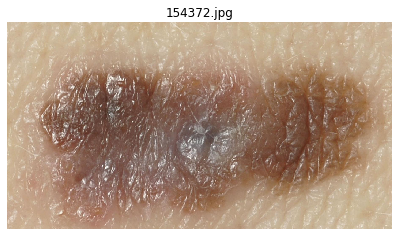

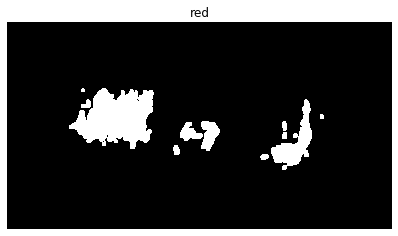

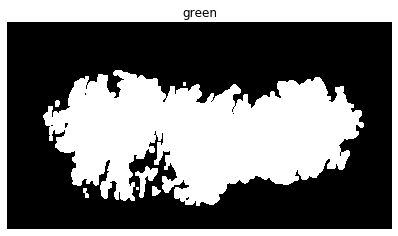

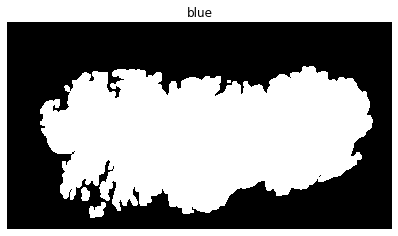

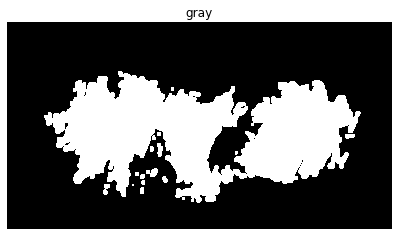

mednode_dataset/melanoma\16175.jpg


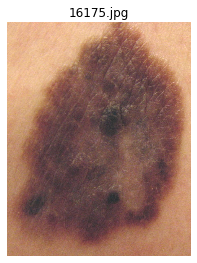

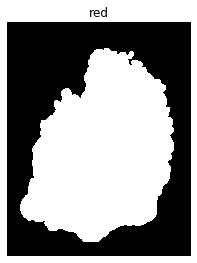

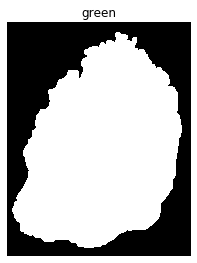

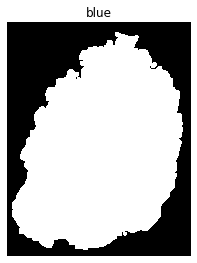

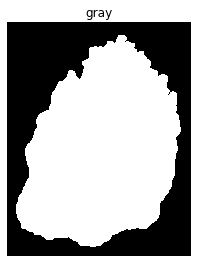

mednode_dataset/melanoma\1651872.jpg


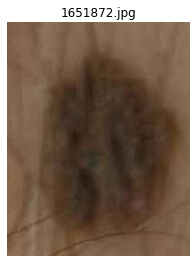

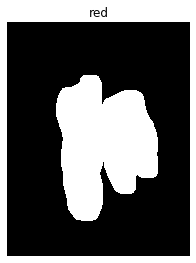

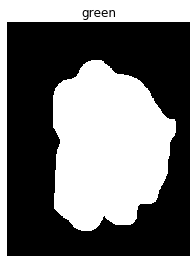

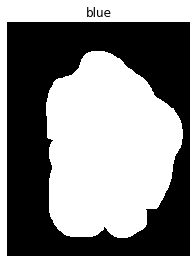

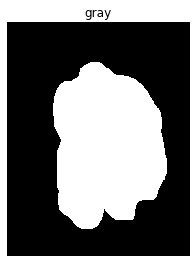

mednode_dataset/melanoma\1657793.jpg


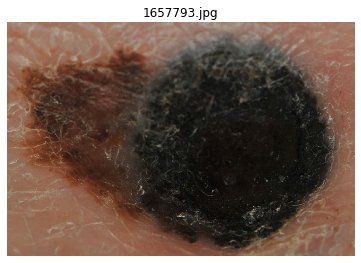

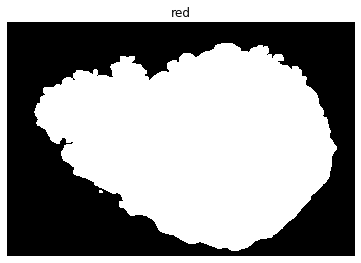

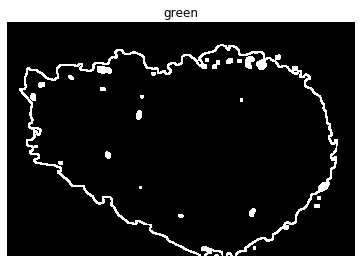

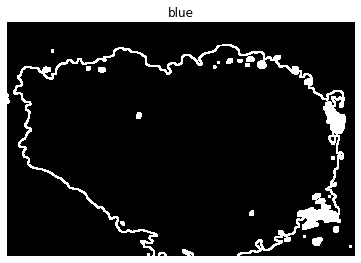

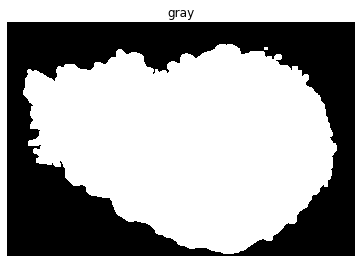

mednode_dataset/melanoma\1685446.jpg


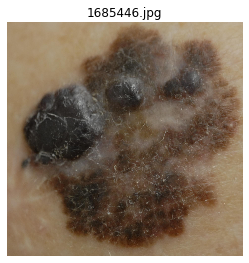

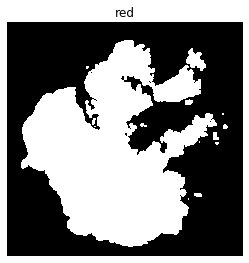

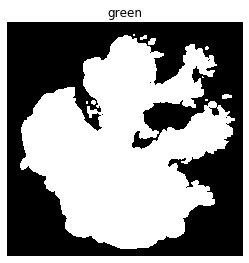

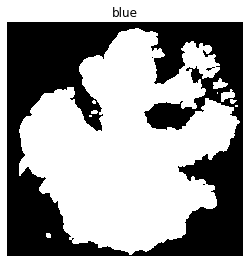

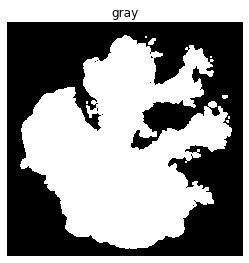

mednode_dataset/melanoma\1698285.jpg


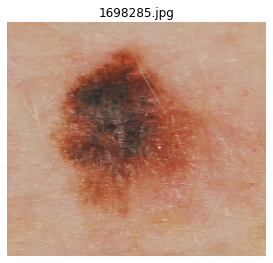

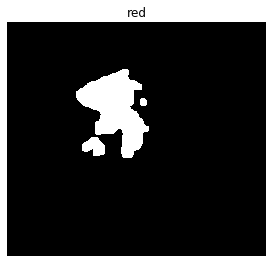

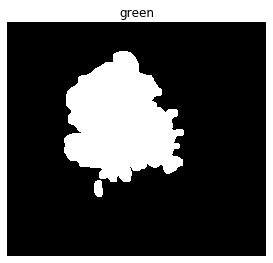

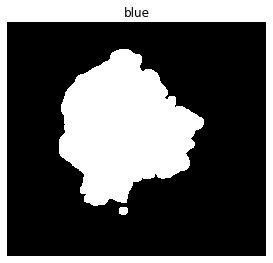

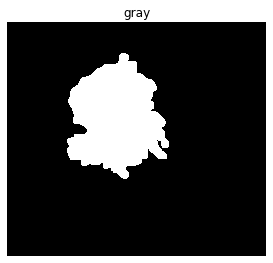

mednode_dataset/melanoma\1732302.jpg


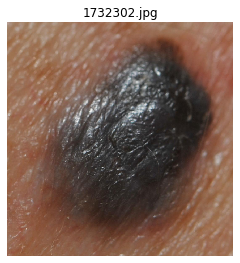

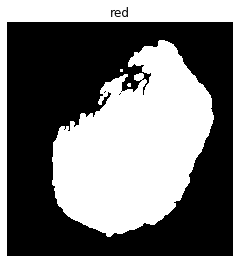

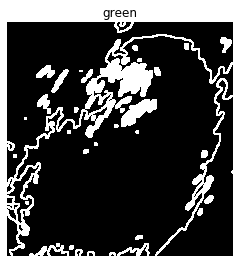

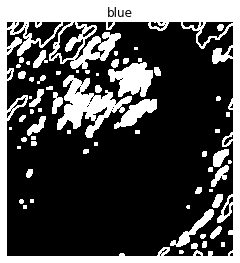

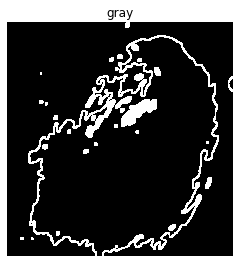

In [118]:
show_imgs_filtered(etiqueta_0, imgs_etiqueta_0)